PREPARAÇÃO DE DADOS PARA CORRELAÇÃO LINEAR - BANCO DE DADOS DE CARTÃO DE CRÉDITO

Importação de bibliotecas

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import matplotlib as mpl

In [26]:
import seaborn as sns

In [7]:
mpl.rcParams['figure.dpi'] = 400  #Parâmetros para os gráficos

DATASET 

In [12]:
df = pd.read_csv('C:/Users/Joao3/Chapter_1_cleaned_Data.csv')

In [15]:
df.head() #Dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [13]:
df.shape

(26664, 30)

In [16]:
features_response = df.columns.tolist()

In [17]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [18]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [32]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']

Exemplo de list comprehension

In [33]:
example_list_comp = [item for item in range(5)]
example_list_comp

[0, 1, 2, 3, 4]

In [59]:
features_response = df.columns.tolist()
features_response[ :5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [61]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [21]:
items_to_remove = ['ID', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school',  'others', 'university']

In [22]:
feature_response = [item for item in features_response if item not in items_to_remove]
features_response

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'others',
 'university']

# CORRELAÇÃO (correlação linear ou de Pearson)

In [23]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
LIMIT_BAL,1.000000,0.027046,-0.232688,-0.111873,0.149157
SEX,0.027046,1.000000,0.014336,-0.031307,-0.088421
EDUCATION,-0.232688,0.014336,1.000000,-0.137097,0.179035
MARRIAGE,-0.111873,-0.031307,-0.137097,1.000000,-0.412828
AGE,0.149157,-0.088421,0.179035,-0.412828,1.000000


<AxesSubplot:>

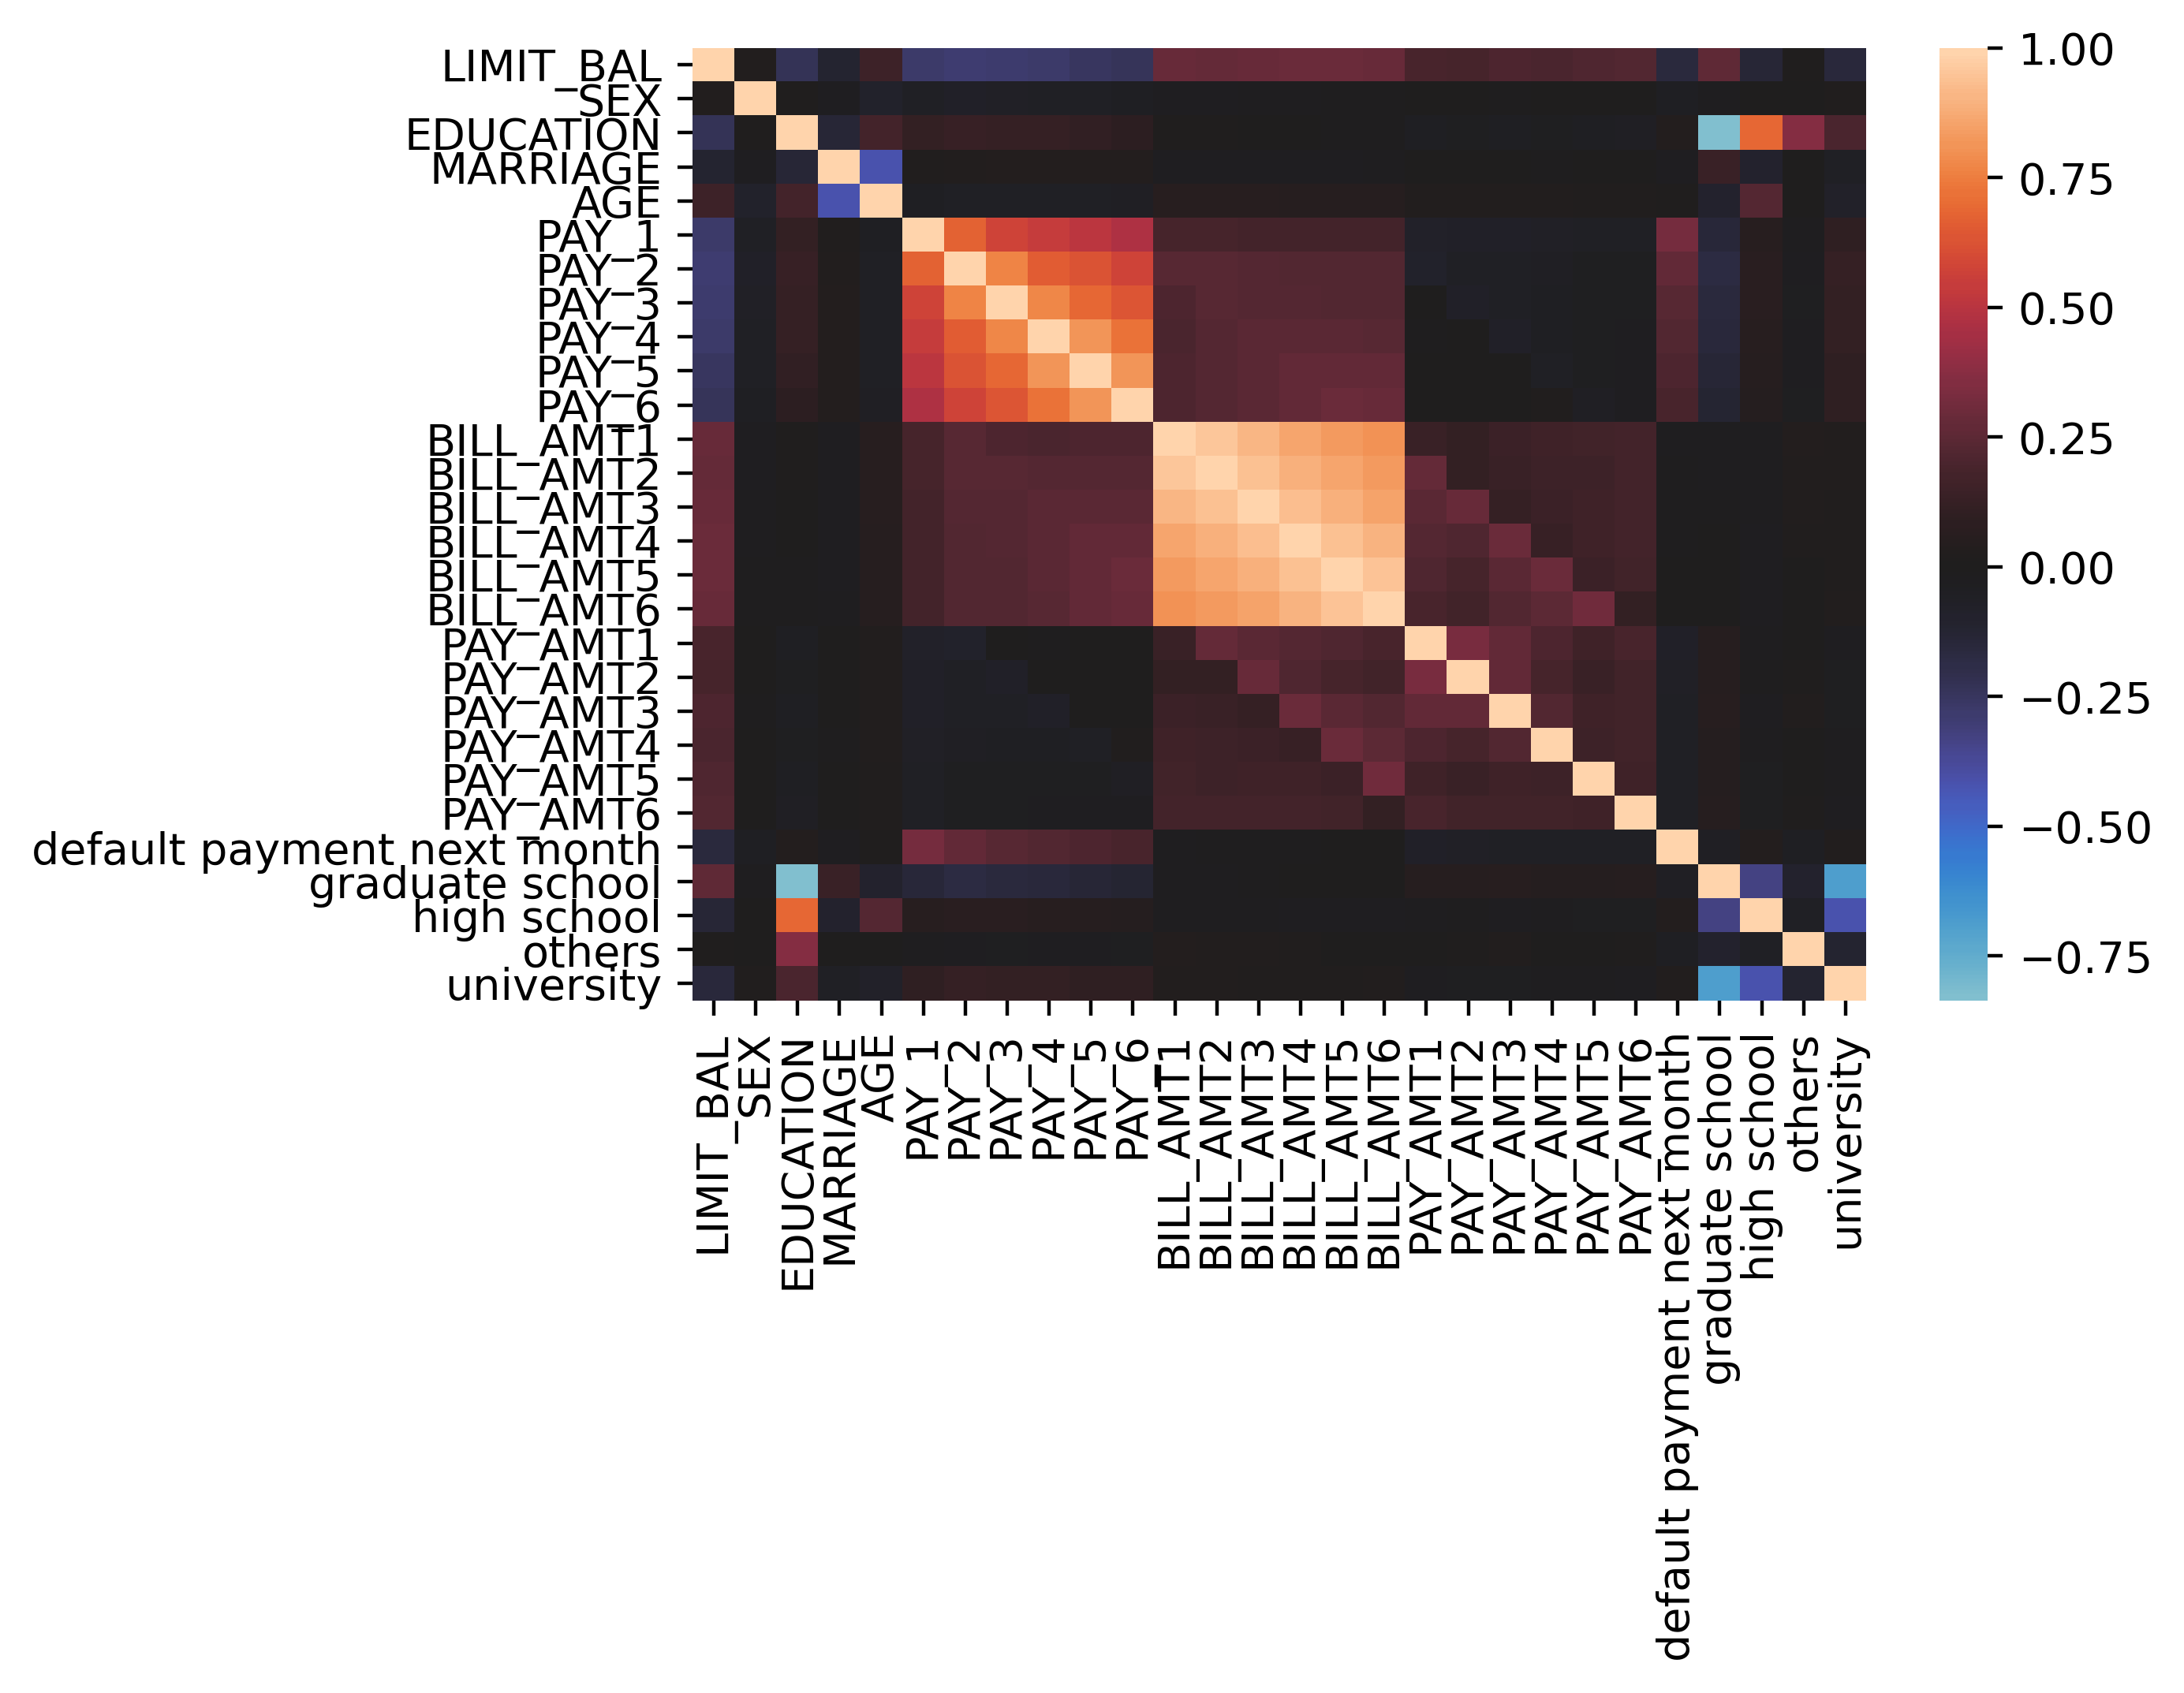

In [36]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           center=0)

In [37]:
corr = df[features_response].corr()
corr.iloc[0:8,0:8]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3
LIMIT_BAL,1.000000,0.027046,-0.232688,-0.111873,0.149157,-0.273396,-0.296471,-0.286613
SEX,0.027046,1.000000,0.014336,-0.031307,-0.088421,-0.058993,-0.070828,-0.067869
EDUCATION,-0.232688,0.014336,1.000000,-0.137097,0.179035,0.112653,0.129558,0.124114
MARRIAGE,-0.111873,-0.031307,-0.137097,1.000000,-0.412828,0.019759,0.025096,0.034308
AGE,0.149157,-0.088421,0.179035,-0.412828,1.000000,-0.044277,-0.054053,-0.055795
PAY_1,-0.273396,-0.058993,0.112653,0.019759,-0.044277,1.000000,0.675430,0.575617
PAY_2,-0.296471,-0.070828,0.129558,0.025096,-0.054053,0.675430,1.000000,0.764960
PAY_3,-0.286613,-0.067869,0.124114,0.034308,-0.055795,0.575617,0.764960,1.000000
